<a href="https://colab.research.google.com/github/gabitza-tech/ETTI-SummerSchool2025/blob/main/Students_MachineLearning_Intro_MultiClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🙂😠 Labeled Faces in the Wild (LFW) Dataset

The **Labeled Faces in the Wild (LFW)** dataset is a widely used benchmark for face recognition and classification tasks. It contains **13,233 images of 5,749 individuals**, captured in unconstrained real-world settings, which include variations in **pose, expression, lighting, and background**.  

For many machine learning experiments, a **smaller subset** is used by filtering individuals with a minimum number of images (e.g., `min_faces_per_person=20`).

Each image is **grayscale or RGB** and can be resized and flattened for use in standard classifiers.  

Key challenges of LFW include:
- **Class imbalance**: Some individuals have more images than others.
- **Unaligned faces**: Variation in pose and expression.
- **Nonlinear separability**: Requires models capable of capturing complex patterns.  

LFW provides a realistic setting to test both **traditional machine learning algorithms** and **deep learning approaches** for face identification and verification.

We will use this dataset for comparing models such as **K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Multi-Layer Perceptrons (MLP)** on the face recognition task.

Let's first take a look at the dataset and its images.

# 🧪 Exercise 1

### Tasks
1. Load the dataset with the default settings:
   - **Minimum 20 faces per person**
   - **Image resize factor: 0.4**
2. Experiment with:
   - **Different image resize factors**
   - **Different values for minimum number of faces per person**

   Observe and report:
   - How many **additional classes** are added
   - How many **additional samples** are included
   - How the **image quality** changes with different resizing factors


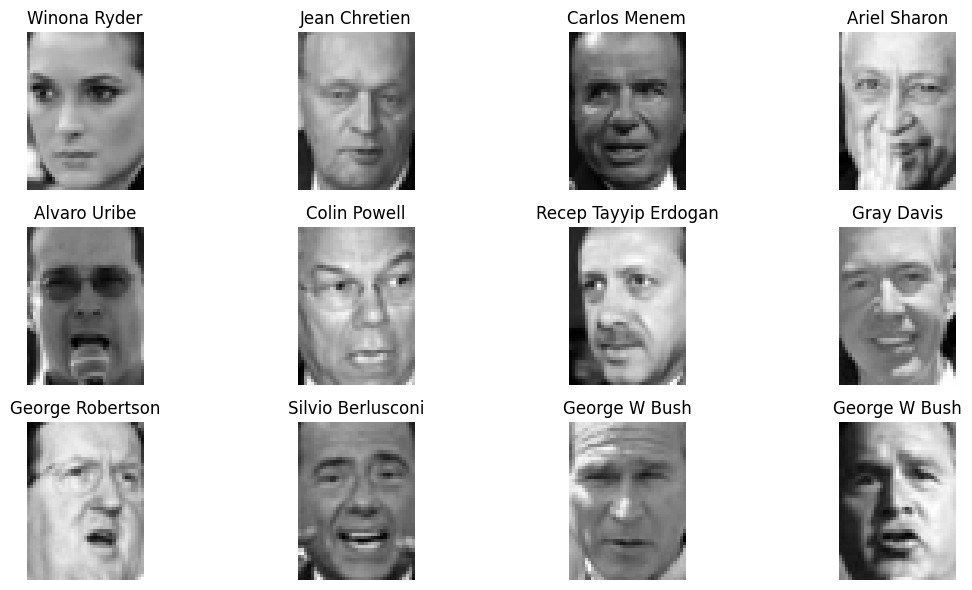

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

# Load LFW dataset (small subset)
lfw = fetch_lfw_people(min_faces_per_person=20, resize=0.4)
# The images in 2D format
images = lfw.images
# The actual name of the labels
target_names = lfw.target_names
# The flatten image (this is what we will work with) - X
x = lfw.data   # flattened images
# The labels values - we were calling these Y
y = lfw.target

# Number of images to display
num_images = 12
plt.figure(figsize=(12, 6))

for i in range(num_images):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(target_names[y[i]])
    plt.axis('off')

plt.tight_layout()
plt.show()

# CODE HERE
# Print some statistics about the dataset, number of samples, number of classes, images size, flatten image size, etc.
# What are the ranges of values for the data samples 'x'?


# Preprocessing, PCA, and Data Splitting

The dataset features are already normalized between **[0, 1]** (scaled grayscale pixel values),  
so no further preprocessing is required.

However, each sample has **over 1850 features** (pixel values) — which is quite high.  
To address this, we use **Principal Component Analysis (PCA)** for dimensionality reduction.  
This helps by:
- Removing redundant features  
- Reducing computational complexity and training time  
- Potentially improving performance  

---

## 📝 Exercise 2

### Tasks
1. Keep the dataset with:
   - **Minimum 20 faces per person**
   - **Resize factor: 0.4**
2. Split the dataset into:
   - **60% Train**
   - **20% Validation**
   - **20% Test**
3. Apply **PCA** to reduce the number of features to **150 components**.
4. Train a **KNN classifier (k = 5)**:
   - Using **original features**
   - Using **PCA-reduced features**
   - Evaluate both on the **Validation set**, then on the **Test set**
5. Check whether the performance trend on the **Validation set** holds for **unseen Test data**.
6. Compare:
   - **Training time**
   - **Final Accuracy**
   - **Weighted F1-score**

---


In [3]:
# CODE FOR DATASET SPLITTING HERE
from sklearn.model_selection import train_test_split

....

print(f"Train: {X_train.shape[0]}, Validation: {X_val.shape[0]}, Test: {X_test.shape[0]}")


SyntaxError: invalid syntax (1104849.py, line 4)

In [ ]:
from sklearn.decomposition import PCA
# CODE FOR PCA here
# -------------------------
# Apply PCA for dimensionality reduction
# -------------------------

pca = PCA(n_components=150, whiten=True, random_state=42)
X_train_pca = ...
X_val_pca = ...
X_test_pca = ...
print(f"PCA reduced feature shape: {X_train_pca.shape}")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# CODE HERE THE TRAINING AND PREDICTION OF A KNN WITH AND WITHOUT PCA
# No PCA
...
y_pred_val = ... # VALIDATION
y_pred = ... #TEST

# PCA
...
y_pred_val_pca = ... #VALIDATION
y_pred_pca = ... #TEST

# VALIDATION
acc = ...
f1_score_nopca = ...

acc_pca = ...
f1_score_pca = ...

print(f"Classification report VALIDATION for KNN with K=5 and no PCA: acc={acc},f1-score(weighted)={f1_score_nopca}")
print(f"Classification report VALIDATION for KNN with K=5 and PCA: acc={acc_pca},f1-score(weighted)={f1_score_pca}")

# EVALUATION
acc = ...
f1_score_nopca = ...

acc_pca = ...
f1_score_pca = ...

print(f"\nClassification report TEST for KNN with K=5 and no PCA: acc={acc},f1-score(weighted)={f1_score_nopca}")
print(f"Classification report TEST for KNN with K=5 and PCA: acc={acc_pca},f1-score(weighted)={f1_score_pca}")


# 🔧 Tuning the Methods on a Validation Set - KNN

Great! We have already seen that **PCA helps a lot** in terms of both **training time** and **performance**, so we will continue using it from now on.  

Next, we want to improve the **KNN classifier** by tuning its hyper-parameters on the **validation set**.  
Up until now, we chose the number of neighbors `K = 5` arbitrarily — this might not be the best choice.  

A crucial step in Machine Learning is **hyper-parameter tuning**. Without a validation set (or a held-out portion of the data), choosing hyper-parameters is essentially guesswork:  
- Sometimes you might get lucky and find a good value.  
- Other times you could end up with subpar results.  

To avoid this, we will perform a **Grid Search** over different values of `K`. Specifically, we will test `K ∈ [1, 3, 5, 7, 10, 13]`.  
After identifying the best `K` based on validation performance, we will then evaluate this setting on the **Test set**.

---

# 🎯 Exercise 3

### Tasks
1. Loop over all `K` values in `[1, 3, 5, 7, 10, 13]`, training and evaluating on the **Validation set**.  
2. Record both **accuracy** and **weighted F1-score** for each `K`.  
3. Select the **best K** from validation and evaluate it on the **Test set**.  
4. Reflect:  
   - Did tuning improve the results?  
   - Or was our initial choice (`K = 5`) already close to optimal?  


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# List of K values to try
k_values = [1, 3, 5, 7, 10, 13]

best_k = None
best_f1 = 0

# Iterate over K values and evaluate on validation set
for k in k_values:
    # Train KNN
    ...

    # Validate

    # Metrics
    f1_val = ...
    acc_val = ...

    print(f"K={k}: Validation acc={acc_val:.4f}, f1(weighted)={f1_val:.4f}")

    # New best value?
    if f1_val > best_f1:
        best_f1 = f1_val
        best_k = k

print(f"\nBest K based on validation F1: K={best_k}")

# Train final model with best K on PCA features
clf_best = ...
...

# Predict on validation and test sets
y_val_best = ...
y_test_best = ...

# Validation metrics
acc_val_best = ...
f1_val_best = ...

# Test metrics
acc_test_best = ...
f1_test_best = ...

print(f"\nValidation (best K={best_k}): acc={acc_val_best:.4f}, f1(weighted)={f1_val_best:.4f}")
print(f"Test (best K={best_k}): acc={acc_test_best:.4f}, f1(weighted)={f1_test_best:.4f}")


# ⚡ Support Vector Machines (SVM)

Now let’s try **Support Vector Machines (SVM)** as an alternative to KNN.  
Unlike KNN, SVM has multiple hyper-parameters to tune, which strongly influence performance.  

We will focus on two key parameters:
- **`C`** (Regularization strength): `[0.1, 1, 10]`
- **`gamma`** (Kernel coefficient): `['scale', 'auto']`

This gives us a grid of possible `(C, gamma)` pairs to explore.  
We will tune them using the **Validation set**, then test the best configuration on unseen data.

---
# Exercise 4
### Tasks
1. Train SVM models for all combinations of:  
   - `C ∈ [0.1, 1, 10]`  
   - `gamma ∈ ['scale', 'auto']`  
2. Evaluate each model on the **Validation set** using **accuracy** and **weighted F1-score**.  
3. Select the best-performing `(C, gamma)` pair.  
4. Evaluate this best model on the **Test set** (accuracy + weighted F1-score).  
5. Compare results:  
   - How does SVM performance compare to **KNN**?  
   - Did tuning `C` and `gamma` significantly change the results?  


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# --- SVM hyperparameters to try ---
C_values = [0.1, 1, 10]
gamma_values = ['scale', 'auto']  # common options for gamma

best_svm_params = None
best_f1_svm = 0

# Iterate over hyperparameters on validation set
for C in C_values:
    for gamma in gamma_values:
        # TRAIN SVM
        ...

        # VALIDATE

        #METRICS
        f1_val = ...
        acc_val = ...

        print(f"SVM C={C}, gamma={gamma}: Validation acc={acc_val:.4f}, f1(weighted)={f1_val:.4f}")

        # New best?
        if f1_val > best_f1_svm:
            best_f1_svm = f1_val
            best_svm_params = {'C': C, 'gamma': gamma}

print(f"\nBest SVM params based on validation F1: {best_svm_params}")

# Train final SVM with best params
svm_best = ...
...

# Predictions
y_val_svm = ...
y_test_svm = ...

# Metrics
acc_val_svm = ...
f1_val_svm = ...

acc_test_svm = ...
f1_test_svm = ...

print(f"\nSVM Validation: acc={acc_val_svm:.4f}, f1(weighted)={f1_val_svm:.4f}")
print(f"SVM Test: acc={acc_test_svm:.4f}, f1(weighted)={f1_test_svm:.4f}")


# 🧠 Multi-Layer Perceptron (MLP)

Finally, let’s explore how a **Multi-Layer Perceptron (MLP)** performs on our dataset.  
Unlike simpler models, MLPs are powerful at handling **non-linear relationships** in complex feature spaces —  
which is especially useful now that we have **150 PCA components** as input features.  

By training an MLP, we can see how a neural network compares against **KNN** and **SVM** in terms of performance and training time.

---

# Exercise 5
### Tasks

1. Train an **MLP classifier** on the PCA-reduced dataset (150 features).  
2. Tune key hyper-parameters (e.g., number of hidden units, layers, activation, learning rate) using the **Validation set**.  
3. Evaluate the best model on the **Test set**, reporting **accuracy** and **weighted F1-score**.  
4. Compare results to **KNN** and **SVM**:  
   - Does MLP achieve better performance?  
   - How does the training time differ?  
5. Reflect on the strengths and weaknesses of using a neural network for this task.  


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

# --- MLP hyperparameters to try ---
hidden_layers = [(50,), (100,), (100,50)]
alphas = [0.0001, 0.001]
activations = ['relu', 'tanh', 'logistic']

best_mlp_params = None
best_f1_mlp = 0

# Iterate over hyperparameters on validation set
for hl in hidden_layers:
    for alpha in alphas:
        for activation in activations:
            mlp_clf = MLPClassifier(
                hidden_layer_sizes=hl,
                activation=activation,
                alpha=alpha,
                max_iter=300,
                early_stopping=True,
                random_state=42
            )
            # TRAIN - SIMILAR TO PREVIOUS METHODS
            ...

            # VALIDATE
            ...

            # METRICS
            f1_val = ...
            acc_val = ...

            print(f"MLP hl={hl}, alpha={alpha}, act={activation}: Validation acc={acc_val:.4f}, f1(weighted)={f1_val:.4f}")

            if f1_val > best_f1_mlp:
                best_f1_mlp = f1_val
                best_mlp_params = {'hidden_layer_sizes': hl, 'alpha': alpha, 'activation': activation}

print(f"\nBest MLP params based on validation F1: {best_mlp_params}")

# Train final MLP with best params
mlp_best = ...
...

# Predictions
y_val_mlp = ...
y_test_mlp = ...

# Metrics
acc_val_mlp = ...
f1_val_mlp = ...

acc_test_mlp = ...
f1_test_mlp = ...

print(f"\nMLP Validation: acc={acc_val_mlp:.4f}, f1(weighted)={f1_val_mlp:.4f}")
print(f"MLP Test: acc={acc_test_mlp:.4f}, f1(weighted)={f1_test_mlp:.4f}")


# ✅ Conclusions

Our experiments showed that different models capture the dataset’s structure in different ways:

- **KNN**: Simple and intuitive, but struggles as feature spaces become complex and non-linear.  
- **SVM**: More powerful than KNN, especially with the right kernel and tuned hyper-parameters, but still limited when data is noisy or classes overlap.  
- **MLP**: Able to model non-linear relationships and generally achieves the best performance on this task.  

That said, the MLP did not continue to improve indefinitely with increasing size or depth.  
Performance plateaued around a relatively small architecture (≈ one hidden layer with ~100 neurons).  
Adding more neurons or layers led to higher training cost without clear accuracy gains.  

---

### Key Takeaways
- **Complex models require sufficient data**: With too few samples and many imbalanced classes, additional model capacity does not translate into better generalization.  
- **Trade-off between complexity and data availability**: More complex models can only shine when backed by enough representative training examples.  
- **Practical implication**: For this dataset, simpler models (like SVM) already provide competitive performance, while MLP shows its strength but is held back by data limitations.  

> In summary: **High model complexity should always be matched with larger, balanced datasets to unlock its full potential.**


# Exercise 6
### Tasks
1. Plot the best f1-score for each method side by side in a bar plot

In [ ]:
import matplotlib.pyplot as plt

# CODE HERE
# F1 scores from best-tuned models
# FILL THE ... WITH THE NECESSARY VALUES
results = {
    'KNN': ...,
    'SVM': ...,
    'MLP': ...
}

# Plot F1 score as bars
plt.figure(figsize=(8,6))
bars = plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red'])
plt.ylabel("Weighted F1 Score")
plt.title("Classifier Comparison (with PCA)")
plt.ylim(0, 1)

# Add F1 score value above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}",
             ha='center', va='bottom', fontsize=10)

plt.show()


# Play more (OPTIONAL)

1. See how different image sizes affect the results.
2. See how adding the other classes affects the results. Can increasing network size now help?
3. Try mitigating the class imbalance issues with the dataset.
4. Try data augmentation! Flip the images horizontaly, rotate them slightly, then flatten them and retrain.